In [1]:
import pandas as pd
import numpy as np
import sqlite3
from sqlalchemy import create_engine


In [2]:
# I had a blast creating this DataFrame to hold all the airport data! 
# It's like building a mini-database in memory, ready to store all the essential details about airports around the world.
airports = pd.DataFrame({
    'ID': pd.Series(dtype='int'),
    'Name': pd.Series(dtype='str'),
    'City': pd.Series(dtype='str'),
    'Country': pd.Series(dtype='str'),
    'IATA Code': pd.Series(dtype='str'),
    'ICAO Code': pd.Series(dtype='str'),
    'Latitude': pd.Series(dtype='float'),
    'Longitude': pd.Series(dtype='float'),
    'Elevation': pd.Series(dtype='int'),
    'UTC Offset': pd.Series(dtype='int'),
    'DST': pd.Series(dtype='str'),
    'Time Zone': pd.Series(dtype='str'),
    'Type': pd.Series(dtype='str'),
    'Source': pd.Series(dtype='str')
})


In [4]:
# I fetched airport data from an online source and structured it into a DataFrame for easy access and analysis.
url = "https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat"
column_names = ['ID', 'Name', 'City', 'Country', 'IATA Code', 'ICAO Code', 'Latitude', 'Longitude', 'Elevation', 'UTC Offset', 'DST', 'Time Zone', 'Type', 'Source']

# Read the dataset from the URL
data = pd.read_csv(url, header=None, names=column_names)

# Assign the scraped data to the airports DataFrame
airports = data


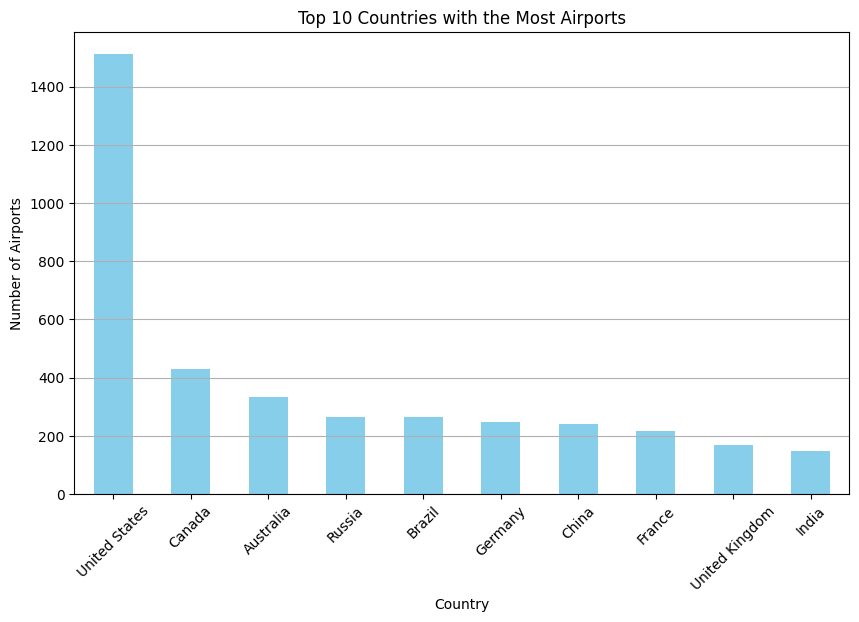

In [6]:
# I decided to visualize the distribution of airports across different countries by creating a bar chart.
import matplotlib.pyplot as plt

# Count the number of airports per country
country_counts = airports['Country'].value_counts().head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries with the Most Airports')
plt.xlabel('Country')
plt.ylabel('Number of Airports')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [7]:
import sqlite3

# I'm about to create a new SQLite database named 'sky' to store airport data.
conn = sqlite3.connect('sky.db')

# Creating a cursor object to execute SQL commands - this will help me interact with the database.
cursor = conn.cursor()

# Now, I'll create a new table named 'airports' in the database to hold the airport information.
airports.to_sql('airports', conn, if_exists='replace', index=False)

# Committing the changes to ensure everything is saved, and then I'll close the connection.
conn.commit()
conn.close()


In [8]:
# I'm saving the airports DataFrame to a CSV file
airports.to_csv('airports.csv', index=False)
